<img src="http://www.mercedes-benz.co.uk/content/media_library/unitedkingdom/mpc_unitedkingdom/passenger_cars_ng/homepage/2012/dropdowns_960x298/2016-dropdowns/s-class-coupe-dropdown-jan-2016.object-Single-MEDIA.tmp/S-Class-Coupe-Dropdown-2016.jpg"/>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими но могут не влезть по памяти
%config InlineBackend.figure_format = 'png' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

Количество столбцов:

In [3]:
len(df_train.columns) -2

376

Первые 5 строк:

In [4]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


Тут у нас несколько столбцов с категориальными признаками.

In [5]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_train.describe(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


Категориальные признаки:

In [28]:
cat_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in cat_cols:
    print('{} -> {}'.format(col, df_train[col].unique()))

X0 -> ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 -> ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 -> ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 -> ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 -> ['d' 'b' 'c' 'a']
X5 -> ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae' 'ah'
 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 -> ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 -> ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


Значения в test.csv, которых не было в train.csv:

In [34]:
for c in cat_cols:
    print(c, ':', end=' ')
    for e in df_test[c].unique():
        if e not in df_train[c].unique(): print(e, end=' ')
    print('\n')

X0 : av ag an ae p bb 

X1 : 

X2 : aj ax ab w ad u 

X3 : 

X4 : 

X5 : t b a z 

X6 : 

X8 : 



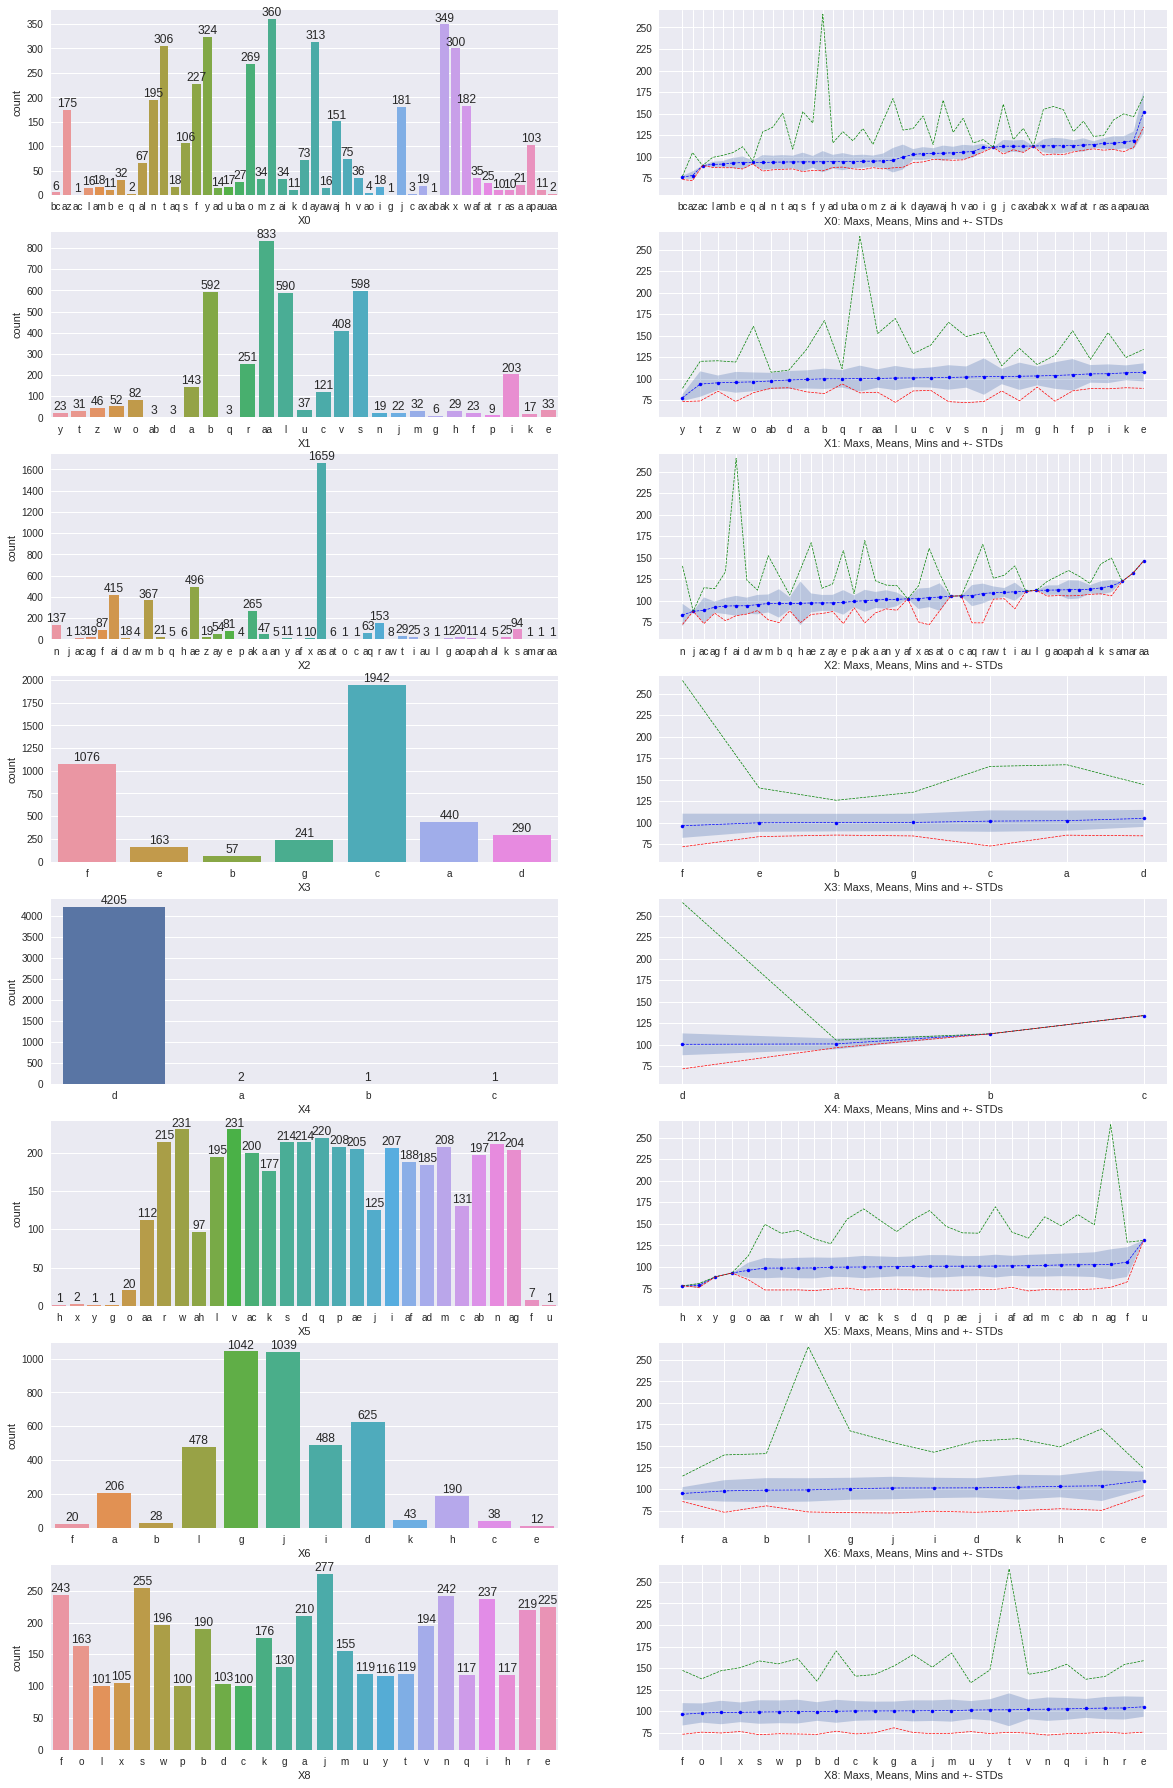

In [36]:
# унес это из кернелов
plt.figure(figsize=(20,32))
for i in range(len(cat_cols)):
    c = cat_cols[i]
    
    means = df_train.groupby(c).y.mean()
    stds =  df_train.groupby(c).y.std().fillna(0)
    maxs =  df_train.groupby(c).y.max()
    mins =  df_train.groupby(c).y.min()
    
    ddd = pd.concat([means, stds, maxs, mins], axis=1); 
    ddd.columns = ['means', 'stds', 'maxs', 'mins']
    ddd.sort_values('means', inplace=True)
    
    plt.subplot(8,2,2*i+1)
    ax = sns.countplot( df_train[c], order=ddd.index.values)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')
    
    plt.subplot(8,2,2*i+2)
    plt.fill_between(range(len( df_train[c].unique())), 
                     ddd.means.values - ddd.stds.values,
                     ddd.means.values + ddd.stds.values,
                     alpha=0.3
                    )
    plt.xticks(range(len( df_train[c].unique())), ddd.index.values)
    plt.plot(ddd.means.values, color='b', marker='.', linestyle='dashed', linewidth=0.7)
    plt.plot(ddd.maxs.values, color='g', linestyle='dashed', linewidth=0.7)
    plt.plot(ddd.mins.values, color='r', linestyle='dashed', linewidth=0.7)
    plt.xlabel(c + ': Maxs, Means, Mins and +- STDs')
    plt.ylim(55, 270)

И остальные признаки:

In [8]:
uniq_col_val = []
for c in df_train.columns[3:]:
    ulen = len(df_train[c].unique())
    uniq_col_val.append(ulen)

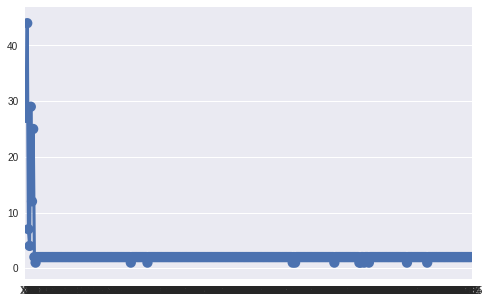

In [9]:
sns.pointplot(df_train.columns[3:], uniq_col_val)

In [10]:
useless_cols = []
for c in df_train.columns[3:]:
    ulen = len(df_train[c].unique())
    if ulen == 1:
        print(c)
        useless_cols.append(c)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


In [11]:
df_train.drop(useless_cols, axis=1, inplace=True)
df_test.drop(useless_cols, axis=1, inplace=True)

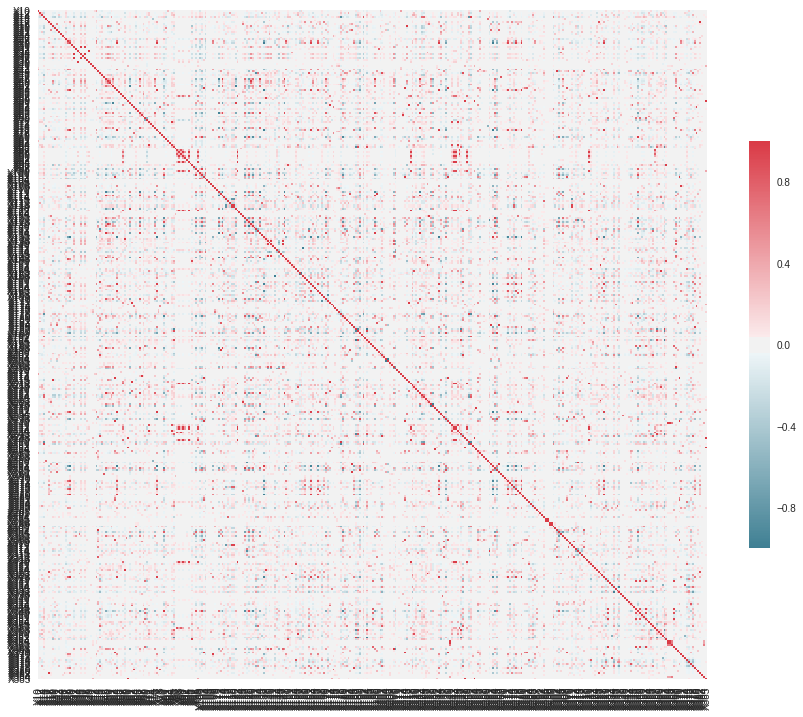

In [12]:
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_train[df_train.columns[2:]].corr(method="spearman"), cmap=cmap,
            square=True, #xticklabels=5, yticklabels=5,
            cbar_kws={"shrink": .5}, 
            #linewidths=.5, 
            ax=ax)

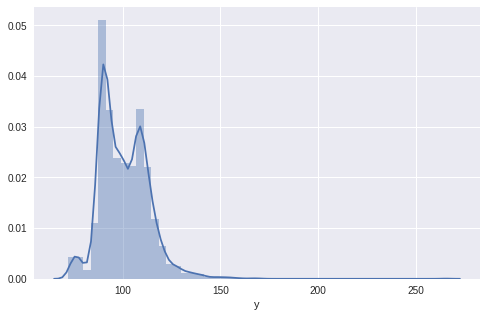

In [13]:
sns.distplot(df_train.y)

In [14]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

"Тупая" оценка по среднему значению:

In [15]:
stupid_regressor = DummyRegressor()
cross_val_score(stupid_regressor, df_train.drop(df_train.columns[:10], axis=1), df_train.y, scoring="r2").mean()

-0.0084039801972325048


<center><h1>  Мера  $R^2$ </h1></center>

Очень хорошая заметка по мере на [machinelearning.ru](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8)

Коэффициент детерминации ($R^2$ - R-квадрат) - это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по признакам дисперсии зависимой переменной) в дисперсии зависимой переменной.

$$\large R^2 = 1 - \frac{RSS}{TSS} $$

$$\large  RSS = \sum^{n}_{t=1}{(y_t - \hat{y})^2}$$
$$\large TSS = \sum^{n}_{t=1}{(y_t - \bar{t})^2}$$
 
где 
- $y_t$ - наши ответы на выборке, 
- $\hat{y}$ - реальные значения на выборке, 
- $ \bar{t}$ - среднее по выборке.


Принимает значения в диапазоне $(-\infty, 1]$, где 1 - это лучший показатель.

Основная проблема применения (выборочного) $R^2$ заключается в том, что его значение увеличивается (не уменьшается) от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют. Поэтому сравнение моделей с разным количеством признаков с помощью коэффициента детерминации, вообще говоря, некорректно.

# Один из бейзлайнов

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
train = []
test = []
for c in df_train.columns:    
    if df_train[c].dtype == 'object':
        lbl = LabelEncoder()
        oh = OneHotEncoder()
        lbl.fit(list(df_train[c].values) + list(df_test[c].values))
        oh.fit(lbl.transform(list(df_train[c].values) + list(df_test[c].values)).reshape(-1,1))
        train.append(lbl.transform(df_train[c].values).reshape(-1,1))
        test.append(lbl.transform(df_test[c].values).reshape(-1,1))

In [17]:
def get_num_features(data):
    return data.drop(['ID','y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis=1, errors='ignore').values

train_sp = get_num_features(df_train)
test_sp =get_num_features(df_test)

train.append(train_sp)

train_data =  np.hstack([m for m in train])

test.append(test_sp)

test_data = np.hstack([m for m in test])

from sklearn.decomposition import PCA, FastICA

n_comp = 20

pca = PCA(n_components=n_comp)
pca_results_train = pca.fit_transform(train_data)
pca_results_test = pca.transform(test_data)

from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

grp = GaussianRandomProjection(n_components=n_comp, eps=0.1)
grp_results_train = grp.fit_transform(train_data)
grp_results_test = grp.transform(test_data)

srp = SparseRandomProjection(n_components=n_comp, dense_output=True)
srp_results_train = srp.fit_transform(train_data)
srp_results_test = srp.transform(test_data)

In [18]:
train_data =  np.hstack([train_data, pca_results_train,grp_results_train, srp_results_train])
test_data = np.hstack([test_data, pca_results_test, grp_results_test,srp_results_test])

In [19]:
import lightgbm as lgbm

In [20]:
params = {}
params['num_trees'] = 500
params['objective'] = 'mse' # check
#params['boosting'] = 'dart' #check
params['learning_rate'] = 0.01
#params['tree_learner'] = 'feature'
params['max_depth'] = 5
#params['early_stopping_round'] = 50
#params['drop_seed'] = random_seed
params['metric'] = ['mse', 'mse']
#params['silent'] = True
params['device'] = 'gpu'

In [21]:
from sklearn.model_selection import ShuffleSplit
kf =  ShuffleSplit(n_splits=10, test_size=0.1)

In [22]:
DTrain = lgbm.Dataset(train_data, label=df_train.y)
DTest = lgbm.Dataset(test_data)

In [23]:
model = lgbm.train(params, DTrain, num_boost_round=200)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error
prediction = model.predict(train_data)
print(r2_score(DTrain.get_label(), prediction))
print(mean_squared_error(DTrain.get_label(), prediction))

0.59998762131
64.2933951055


In [25]:
y_pred = model.predict(test_data)

In [26]:
output = pd.DataFrame({'id': df_test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('lgbm_baseline.csv', index=False)

Получили **0.54212** на Public Leaderboard.